In [2]:
import pandas as pd

# New Section

In [1]:
import numpy as np
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'seaborn'

In [4]:
data = pd.read_csv("/content/fulfilment_center_info.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/fulfilment_center_info.csv'

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
meal = pd.read_csv("/content/meal_info.csv")
centerinfo = pd.read_csv("/content/fulfilment_center_info.csv")

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [ ]:
train['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [ ]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [ ]:
meal_info = pd.read_csv("meal_info.csv")
center_info = pd.read_csv("fulfilment_center_info.csv")

In [ ]:
trainfinal = pd.merge(train, meal_info, on="meal_id",how="outer")
trainfinal = pd.merge(trainfinal, center_info, on="center_id",how="outer")
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [ ]:
trainfinal = trainfinal.drop(['center_id','meal_id'], axis=1)
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [ ]:
cols = trainfinal.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [ ]:
cols = cols[:2] + cols[:9] + cols[7:9] + cols[2:7]
print(cols)

['id', 'week', 'id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [ ]:
cols = trainfinal.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [ ]:
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [ ]:
trainfinal = trainfinal[cols]
trainfinal.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb1 = LabelEncoder()
trainfinal['center_type'] = lb1.fit_transform(trainfinal['center_type'])
lb2 = LabelEncoder()
trainfinal['category'] = lb2.fit_transform(trainfinal['category'])

In [ ]:
# Convert the encoded 'category' column to numeric type
trainfinal['category'] = trainfinal['category'].astype(int)

In [ ]:
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,2,2.0,0,Thai,136.83,152.29,0,0,177
1,1018704,2,647,56,2,2.0,0,Thai,135.83,152.29,0,0,323
2,1196273,3,647,56,2,2.0,0,Thai,132.92,133.92,0,0,96
3,1116527,4,647,56,2,2.0,0,Thai,135.86,134.86,0,0,163
4,1343872,5,647,56,2,2.0,0,Thai,146.50,147.50,0,0,215


In [ ]:
trainfinal.shape

(456548, 13)

<ipython-input-96-e637f719d31a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainfinal.num_orders, bins=25)


Text(0.5, 1.0, 'num_orders distribution')

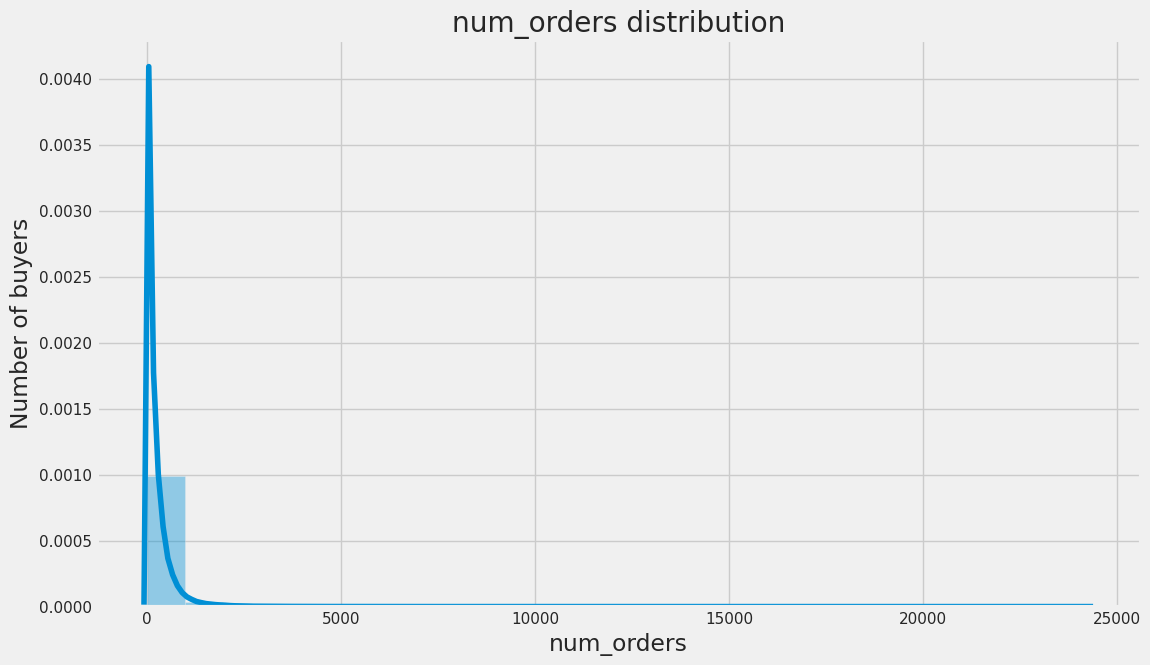

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(trainfinal.num_orders, bins=25)
plt.xlabel("num_orders")
plt.ylabel("Number of buyers")
plt.title("num_orders distribution")

In [ ]:
# Convert 'category' column to numeric using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
trainfinal['category'] = le.fit_transform(trainfinal['category'].astype(str)) # Convert to string type before encoding

# Drop 'id' column and calculate correlations
trainfinal2 = trainfinal.drop(['id'],axis=1)

# Convert all columns to numeric, coercing errors
trainfinal2 = trainfinal2.apply(pd.to_numeric, errors='coerce')

correlation = trainfinal2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
print(columns)

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'city_code', 'region_code', 'category', 'week'],
      dtype='object')


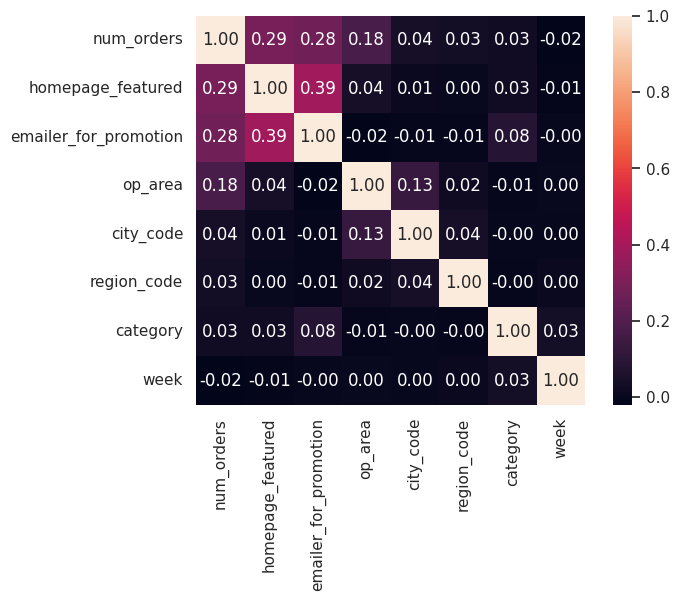

In [ ]:
correlation_map = np.corrcoef(trainfinal2[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [ ]:
features = columns.drop(['num_orders'])
trainfinal3 = trainfinal[features]
x = trainfinal3.values
y = trainfinal['num_orders'].values

In [ ]:
trainfinal3.head()

,homepage_featured,emailer_for_promotion,op_area,city_code,region_code,category,week
0,0,0,2.0,647,56,0,1
1,0,0,2.0,647,56,0,2
2,0,0,2.0,647,56,0,3
3,0,0,2.0,647,56,0,4
4,0,0,2.0,647,56,0,5


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
import numpy as np

# Check for invalid values in y_train
print("Number of NaN values in y_train:", np.isnan(y_train).sum())
print("Number of infinite values in y_train:", np.isinf(y_train).sum())
print("Max value in y_train:", np.max(y_train))

# If there are invalid values, handle them appropriately. For example:
# Replace NaN with a reasonable value (e.g., mean)
y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train))

# Replace infinite values with a large number or cap them
y_train = np.clip(y_train, a_min=None, a_max=1e6)  # Adjust the upper limit as needed

# Retrain the model
XG = XGBRegressor()
XG.fit(x_train, y_train)
# ... rest of your code ...

Number of NaN values in y_train: 0
Number of infinite values in y_train: 0
Max value in y_train: 13580


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = XG.predict(x_test)

In [ ]:
y_pred[y_pred<0] = 0

In [ ]:
from sklearn.metrics import mean_squared_log_error  # Import the specific metric function
import numpy as np

print('RMSLE:', 100 * np.sqrt(mean_squared_log_error(y_test, y_pred)))

RMSLE: 92.86275560198747


In [ ]:
L = Lasso()
L.fit(x_train,y_train) # Change X_train to x_train

# Split the data into training and validation sets if you haven't already
from sklearn.model_selection import train_test_split
x_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

y_pred = L.predict(X_val) # Now X_val is defined
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred))) # You will likely need to define y_val as well

RMSLE: 127.74614816755965


In [ ]:
L = Lasso()
L.fit(x_train, y_train)  # Pass x_train and y_train as separate arguments

# Split the data into training and validation sets if you haven't already
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

y_pred = L.predict(x_val) # Use x_val, which is now defined
from sklearn import metrics
print('RMSEL:',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSEL: 127.62508673223793


In [ ]:
EN = ElasticNet()
EN.fit(x_train, y_train)
y_pred = EN.predict(x_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 133.32235158857094


In [ ]:
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE: 89.28288170332527


In [ ]:
KNN = KNeighborsRegressor()
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE: 101.64306681702283


In [ ]:
GB = GradientBoostingRegressor()
GB.fit(x_train, y_train)
y_pred = GB.predict(x_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE: 99.11605092121599


In [ ]:
import pickle
pickle.dump(DT,open('fdemand.pkl','wb'))

testfinal = pd.merge(test, meal_info, on="meal_id",how="outer")
testfinal = pd.merge(testfinal, center_info, on="center_id",how="outer")
testfinal = testfinal.drop(['center_id','meal_id'], axis=1)

# Adjust column reordering to keep 'center_type'
tcols = testfinal.columns.tolist()
tcols = tcols[:2] + tcols[8:] + tcols[2:8] + tcols[6:8] + tcols[2:6] # Modified line to include 'center_type'
testfinal = testfinal[tcols]

# Check for duplicate 'category' columns and drop if necessary
if testfinal['category'].shape[1] > 1:
    # Assuming the first 'category' column is the correct one
    testfinal = testfinal.loc[:, ~testfinal.columns.duplicated()]

lb1 = LabelEncoder()
testfinal['center_type'] = lb1.fit_transform(testfinal['center_type'])

lb2 = LabelEncoder()
testfinal['category'] = lb2.fit_transform(testfinal['category'])

lb3 = LabelEncoder()
testfinal['cuisine'] = lb3.fit_transform(testfinal['cuisine'])

x_test = testfinal[features].values

In [ ]:
pred = DT.predict(x_test)
pred[pred<0] = 0
submit = pd.DataFrame({'id':test['id'], 'num_orders':pred})
submit.to_csv("submission.csv", index=False)
submit.describe()

,id,num_orders
count,3.257300e+04,32573.000000
mean,1.248476e+06,202.746295
std,1.441580e+05,269.909338
min,1.000085e+06,13.000000
25%,1.123969e+06,55.000000
50%,1.247296e+06,121.600000
75%,1.372971e+06,261.000000
max,1.499996e+06,8169.000000
